In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cluster_data = pd.read_csv("cluster_data.txt", sep="\t", names = ["index", "X", "Y"])
cluster_data.drop(cluster_data.columns[0], axis=1, inplace=True)

In [3]:
cluster_data

,X,Y
0,0.000000,0.000000
1,0.100000,-0.100000
2,0.200000,-0.200000
3,0.300000,-0.300000
4,0.400000,-0.400000
...,...,...
795,3.716809,-0.214190
796,2.452936,0.320436
797,2.514635,0.376550
798,3.738552,-0.172199


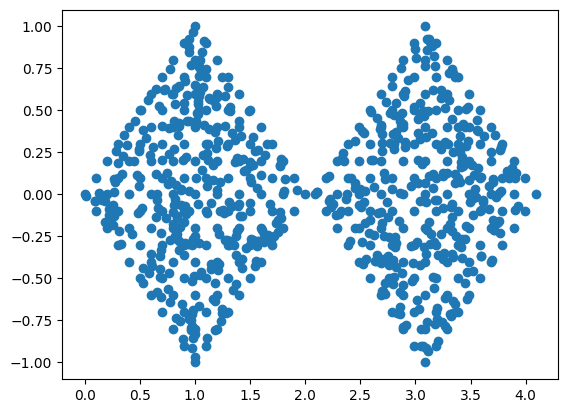

In [4]:
# Plot the initial dataset
plt.scatter(cluster_data["X"], cluster_data["Y"])
plt.show()

In [5]:
# Kmeans Clustering
def Kmeans_Clustering(dataset, k, tol=1e-4, max_iters=500):
    # Pandas sample will return a random sample of datapoints to use as the initial k centroids        
    centroids = dataset.sample(k)
        
    # Maximum number of iterations to prevent overworking
    for _ in range(max_iters):
        # Compute the Squared Euclidean Distance from each datapoint to the centroids
        clusters = []
        for i in range(dataset.shape[0]):
            distances = []
            for j in range(k):
                thetaj = centroids.iloc[j,:2].to_numpy()
                xi = dataset.iloc[i,:2].to_numpy()
                euclid_distance = np.linalg.norm(xi - thetaj) ** 2
                distances.append(euclid_distance)

            # Assign every point a cluster
            cluster = np.argmin(distances)
            clusters.append(cluster)
            
        dataset["Cluster"] = clusters
            
        # Updating parameters by assigning the centroid to the mean of all vectors            
        updated_centroids = dataset.groupby("Cluster").agg("mean").reset_index(drop=True)
        
        # If the centroids change by an amount smaller than the specified amount, terminate the program
        if np.linalg.norm(updated_centroids.to_numpy() - centroids.iloc[:, :2].to_numpy()) < tol:
            return dataset, updated_centroids
        
        centroids = updated_centroids

    return dataset, updated_centroids

In [6]:
# Run the K-Means clustering method
kmeans_clusters, kmeans_centroids = Kmeans_Clustering(cluster_data, 8)

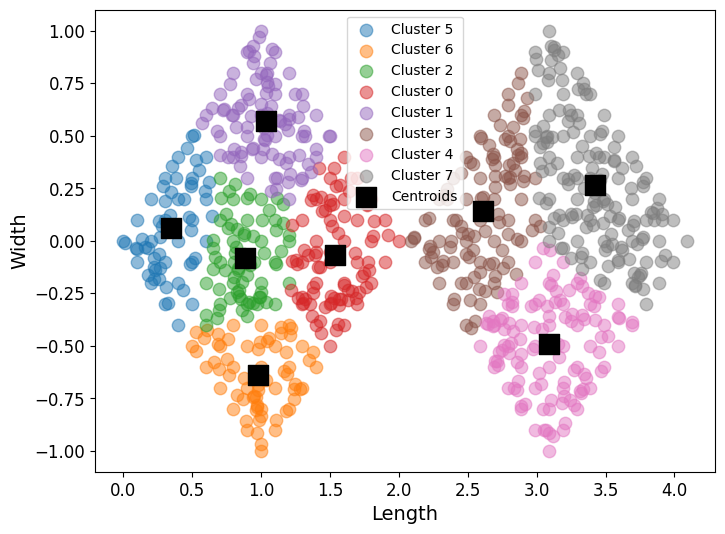

In [7]:
# Plot the clusters
fig, ax = plt.subplots(figsize=(8, 6))

for cluster_label in kmeans_clusters['Cluster'].unique():
    cluster_data = kmeans_clusters[kmeans_clusters['Cluster'] == cluster_label]
    ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], marker='o', s=80, alpha=0.5, label=f'Cluster {cluster_label}')

ax.scatter(kmeans_centroids.iloc[:, 0], kmeans_centroids.iloc[:, 1], marker='s', s=200, c='black', label='Centroids')

ax.set_xlabel('Length', fontsize=14)
ax.set_ylabel('Width', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()